In [1]:
import pandas as pd
df=pd.read_csv('ABBREV.csv')

In [2]:
df.head()

,index,Age,Height (cm),Weight (kg),Gender,BMI,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,...,Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0.0,70,161,117,Female,45.14,1001.0,"BUTTER,WITH SALT",15.87,717.0,...,0.0,0.06,24.0,0.02,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1.0,41,176,77,Female,24.86,1002.0,"BUTTER,WHIPPED,W/ SALT",16.72,718.0,...,0.0,0.06,23.0,0.05,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2.0,21,157,66,Female,26.78,1003.0,"BUTTER OIL,ANHYDROUS",0.24,876.0,...,0.0,0.00,4.0,0.00,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3.0,24,157,116,Male,47.06,1004.0,"CHEESE,BLUE",42.41,353.0,...,0.0,0.50,528.0,0.31,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4.0,75,151,111,Female,48.68,1005.0,"CHEESE,BRICK",41.11,371.0,...,0.0,0.51,674.0,0.43,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [3]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [4]:
df['Gender']

0       1
1       1
2       1
3       0
4       1
       ..
8786    1
8787    0
8788    0
8789    1
8790    0
Name: Gender, Length: 8791, dtype: int64

In [5]:
df.shape

(8791, 24)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8791 entries, 0 to 8790
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           8790 non-null   float64
 1   Age             8791 non-null   int64  
 2   Height (cm)     8791 non-null   int64  
 3   Weight (kg)     8791 non-null   int64  
 4   Gender          8791 non-null   int64  
 5   BMI             8791 non-null   float64
 6   NDB_No          8790 non-null   float64
 7   Shrt_Desc       8790 non-null   object 
 8   Water_(g)       8789 non-null   float64
 9   Energ_Kcal      8790 non-null   float64
 10  Protein_(g)     8790 non-null   float64
 11  Lipid_Tot_(g)   8790 non-null   float64
 12  Ash_(g)         8465 non-null   float64
 13  Carbohydrt_(g)  8790 non-null   float64
 14  Fiber_TD_(g)    8196 non-null   float64
 15  Sugar_Tot_(g)   6958 non-null   float64
 16  Calcium_(mg)    8442 non-null   float64
 17  Iron_(mg)       8646 non-null   f

In [7]:
df.duplicated().sum()

0

<Axes: >

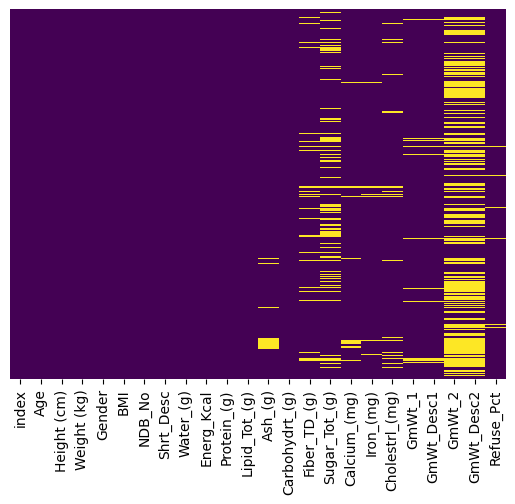

In [8]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [9]:
df.isna().sum()

index                1
Age                  0
Height (cm)          0
Weight (kg)          0
Gender               0
BMI                  0
NDB_No               1
Shrt_Desc            1
Water_(g)            2
Energ_Kcal           1
Protein_(g)          1
Lipid_Tot_(g)        1
Ash_(g)            326
Carbohydrt_(g)       1
Fiber_TD_(g)       595
Sugar_Tot_(g)     1833
Calcium_(mg)       349
Iron_(mg)          145
Cholestrl_(mg)     411
GmWt_1             301
GmWt_Desc1         300
GmWt_2            3966
GmWt_Desc2        3966
Refuse_Pct          51
dtype: int64

In [11]:
df.drop(['GmWt_1','GmWt_Desc1','GmWt_2','GmWt_Desc2','Refuse_Pct'],axis=1,inplace=True)

In [18]:
df['Energ_Kcal'].fillna(df['Energ_Kcal'].median(),inplace=True)

df.isna().sum()

index             1
Age               0
Height (cm)       0
Weight (kg)       0
Gender            0
BMI               0
NDB_No            0
Shrt_Desc         1
Water_(g)         0
Energ_Kcal        0
Protein_(g)       0
Lipid_Tot_(g)     0
Ash_(g)           0
Carbohydrt_(g)    0
Fiber_TD_(g)      0
Sugar_Tot_(g)     0
Calcium_(mg)      0
Iron_(mg)         0
Cholestrl_(mg)    0
dtype: int64

In [19]:
df['Shrt_Desc'].unique()

array(['BUTTER,WITH SALT', 'BUTTER,WHIPPED,W/ SALT',
       'BUTTER OIL,ANHYDROUS', ..., 'SNAIL,RAW', 'TURTLE,GREEN,RAW', nan],
      dtype=object)

In [20]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df["Shrt_Desc"]=imputer.fit_transform(df['Shrt_Desc'].values.reshape(-1,1))[:,0]

In [21]:
df.isna().sum()

index             1
Age               0
Height (cm)       0
Weight (kg)       0
Gender            0
BMI               0
NDB_No            0
Shrt_Desc         0
Water_(g)         0
Energ_Kcal        0
Protein_(g)       0
Lipid_Tot_(g)     0
Ash_(g)           0
Carbohydrt_(g)    0
Fiber_TD_(g)      0
Sugar_Tot_(g)     0
Calcium_(mg)      0
Iron_(mg)         0
Cholestrl_(mg)    0
dtype: int64

In [22]:
df.head()

,index,Age,Height (cm),Weight (kg),Gender,BMI,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Cholestrl_(mg)
0,0.0,70,161,117,1,45.14,1001.0,"BUTTER,WITH SALT",15.87,717.0,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,215.0
1,1.0,41,176,77,1,24.86,1002.0,"BUTTER,WHIPPED,W/ SALT",16.72,718.0,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,225.0
2,2.0,21,157,66,1,26.78,1003.0,"BUTTER OIL,ANHYDROUS",0.24,876.0,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,256.0
3,3.0,24,157,116,0,47.06,1004.0,"CHEESE,BLUE",42.41,353.0,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,75.0
4,4.0,75,151,111,1,48.68,1005.0,"CHEESE,BRICK",41.11,371.0,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,94.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8791 entries, 0 to 8790
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           8790 non-null   float64
 1   Age             8791 non-null   int64  
 2   Height (cm)     8791 non-null   int64  
 3   Weight (kg)     8791 non-null   int64  
 4   Gender          8791 non-null   int64  
 5   BMI             8791 non-null   float64
 6   NDB_No          8791 non-null   float64
 7   Shrt_Desc       8791 non-null   object 
 8   Water_(g)       8791 non-null   float64
 9   Energ_Kcal      8791 non-null   float64
 10  Protein_(g)     8791 non-null   float64
 11  Lipid_Tot_(g)   8791 non-null   float64
 12  Ash_(g)         8791 non-null   float64
 13  Carbohydrt_(g)  8791 non-null   float64
 14  Fiber_TD_(g)    8791 non-null   float64
 15  Sugar_Tot_(g)   8791 non-null   float64
 16  Calcium_(mg)    8791 non-null   float64
 17  Iron_(mg)       8791 non-null   f

In [24]:
def check_outliers(col,data):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR
    outliers=[]
    for i in range (len(data)):
        if data.loc[i,col]>upper_b or data.loc[i,col]<lower_b:
            outliers.append(data.loc[i,col])
    return outliers

In [25]:
def handle_outliers(col,data):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR
    for i in range (len(data)):
        if data.loc[i,col]>upper_b:
            data.loc[i,col]=upper_b

        elif data.loc[i,col]<lower_b:
              data.loc[i,col]=lower_b

In [26]:
check_outliers('Age',df)

[]

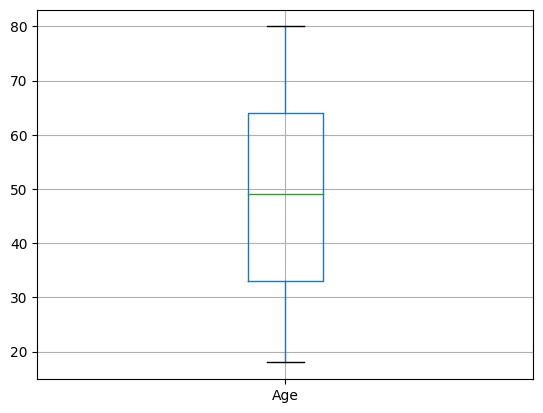

In [27]:
boxplot=df.boxplot('Age')

In [28]:
handle_outliers('Age',df)

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8791 entries, 0 to 8790
Columns: 8804 entries, index to Shrt_Desc_ZWIEBACK
dtypes: float64(14), int64(4), uint8(8786)
memory usage: 74.9 MB


In [31]:
df.head()

,index,Age,Height (cm),Weight (kg),Gender,BMI,NDB_No,Water_(g),Energ_Kcal,Protein_(g),...,"Shrt_Desc_YOGURT,PLN,SKIM MILK,13 GRAMS PROT PER 8 OZ","Shrt_Desc_YOGURT,PLN,WHL MILK,8 GRAMS PROT PER 8 OZ","Shrt_Desc_YOGURT,VAN OR LEM FLAV,NONFAT MILK,SWTND W/LOW-CALORIE SWTNR","Shrt_Desc_YOGURT,VAN/LEM FLAV,NONFAT MILK,W/ LO-CAL SWTNR,FORT W/VIT D","Shrt_Desc_YOGURT,VANILLA FLAVOR,LOWFAT MILK,SWTND W/ LO CAL SWTNR","Shrt_Desc_YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ","Shrt_Desc_YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ,FORT W/ VIT D","Shrt_Desc_YOGURT,VANILLA,NON-FAT","Shrt_Desc_YOKAN,PREP FROM ADZUKI BNS & SUGAR",Shrt_Desc_ZWIEBACK
0,0.0,70,161,117,1,45.14,1001.0,15.87,717.0,0.85,...,0,0,0,0,0,0,0,0,0,0
1,1.0,41,176,77,1,24.86,1002.0,16.72,718.0,0.49,...,0,0,0,0,0,0,0,0,0,0
2,2.0,21,157,66,1,26.78,1003.0,0.24,876.0,0.28,...,0,0,0,0,0,0,0,0,0,0
3,3.0,24,157,116,0,47.06,1004.0,42.41,353.0,21.40,...,0,0,0,0,0,0,0,0,0,0
4,4.0,75,151,111,1,48.68,1005.0,41.11,371.0,23.24,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.to_csv('preprocessed_data.csv', index=False)

In [33]:
DF2=pd.read_csv('preprocessed_data.csv')

In [ ]:
DF2.head()

,index,Age,Height (cm),Weight (kg),Gender,BMI,NDB_No,Water_(g),Energ_Kcal,Protein_(g),...,"Shrt_Desc_YOGURT,PLN,SKIM MILK,13 GRAMS PROT PER 8 OZ","Shrt_Desc_YOGURT,PLN,WHL MILK,8 GRAMS PROT PER 8 OZ","Shrt_Desc_YOGURT,VAN OR LEM FLAV,NONFAT MILK,SWTND W/LOW-CALORIE SWTNR","Shrt_Desc_YOGURT,VAN/LEM FLAV,NONFAT MILK,W/ LO-CAL SWTNR,FORT W/VIT D","Shrt_Desc_YOGURT,VANILLA FLAVOR,LOWFAT MILK,SWTND W/ LO CAL SWTNR","Shrt_Desc_YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ","Shrt_Desc_YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ,FORT W/ VIT D","Shrt_Desc_YOGURT,VANILLA,NON-FAT","Shrt_Desc_YOKAN,PREP FROM ADZUKI BNS & SUGAR",Shrt_Desc_ZWIEBACK
0,0.0,70,161,117,1,45.14,1001.0,15.87,717.0,0.85,...,0,0,0,0,0,0,0,0,0,0
1,1.0,41,176,77,1,24.86,1002.0,16.72,718.0,0.49,...,0,0,0,0,0,0,0,0,0,0
2,2.0,21,157,66,1,26.78,1003.0,0.24,876.0,0.28,...,0,0,0,0,0,0,0,0,0,0
3,3.0,24,157,116,0,47.06,1004.0,42.41,353.0,21.40,...,0,0,0,0,0,0,0,0,0,0
4,4.0,75,151,111,1,48.68,1005.0,41.11,371.0,23.24,...,0,0,0,0,0,0,0,0,0,0
